In [1]:
import pandas as pd
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

In [2]:
# Degree Centrality
G = pd.read_csv("flight_hault.csv", names = ["ID","Name","City","Country","IATA_FAA","ICAO","Latitude","Longitude","Altitude","Time","DST","Tz database time"] )
G

,ID,Name,City,Country,IATA_FAA,ICAO,Latitude,Longitude,Altitude,Time,DST,Tz database time
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...,...
8102,9537,Mansons Landing Water Aerodrome,Mansons Landing,Canada,YMU,\N,50.066667,-124.983333,0,-8.0,A,America/Vancouver
8103,9538,Port McNeill Airport,Port McNeill,Canada,YMP,\N,50.575556,-127.028611,225,-8.0,A,America/Vancouver
8104,9539,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,YTG,\N,50.883333,-126.833333,0,-8.0,A,America/Vancouver
8105,9540,Deer Harbor Seaplane,Deer Harbor,United States,DHB,\N,48.618397,-123.005960,0,-8.0,A,America/Los_Angeles


In [3]:
G.shape

(8107, 12)

In [4]:
G.isna().sum()

ID                     0
Name                   0
City                   0
Country                0
IATA_FAA            2227
ICAO                  64
Latitude               0
Longitude              0
Altitude               0
Time                   0
DST                    0
Tz database time       0
dtype: int64

In [5]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in G.columns if G[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(G[feature].isnull().mean() * 100 , 4),  ' % missing values')

IATA_FAA 27.4701  % missing values
ICAO 0.7894  % missing values


In [6]:
# Dropping all na  values as Data set is Big

G.dropna(inplace=True)

In [7]:
G.isna().sum()

ID                  0
Name                0
City                0
Country             0
IATA_FAA            0
ICAO                0
Latitude            0
Longitude           0
Altitude            0
Time                0
DST                 0
Tz database time    0
dtype: int64

In [8]:
G.shape

(5817, 12)

In [9]:
G = G.iloc[:, 1:10]

In [10]:
g = nx.Graph() #Create an empty graph with no nodes and no edges.
g = nx.from_pandas_edgelist(G, source = 'IATA_FAA', target = 'ICAO')

In [11]:

print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 11089
Number of edges: 5816
Average degree:   1.0490


In [12]:
b = nx.degree_centrality(g)  # Degree Centrality
print(b)

### Degree centrality is the simplest centrality measure to compute. Recall that a node's degree is simply a count of how many social connections (i.e., edges) it has. The degree centrality for a node is simply its degree. A node with 10 social connections would have a degree centrality of 10. A node with 1 edge would have a degree centrality of 1.

{'GKA': 9.018759018759019e-05, 'AYGA': 9.018759018759019e-05, 'MAG': 9.018759018759019e-05, 'AYMD': 9.018759018759019e-05, 'HGU': 9.018759018759019e-05, 'AYMH': 9.018759018759019e-05, 'LAE': 9.018759018759019e-05, 'AYNZ': 9.018759018759019e-05, 'POM': 9.018759018759019e-05, 'AYPY': 9.018759018759019e-05, 'WWK': 9.018759018759019e-05, 'AYWK': 9.018759018759019e-05, 'UAK': 9.018759018759019e-05, 'BGBW': 9.018759018759019e-05, 'GOH': 9.018759018759019e-05, 'BGGH': 9.018759018759019e-05, 'SFJ': 9.018759018759019e-05, 'BGSF': 9.018759018759019e-05, 'THU': 9.018759018759019e-05, 'BGTL': 9.018759018759019e-05, 'AEY': 9.018759018759019e-05, 'BIAR': 9.018759018759019e-05, 'EGS': 9.018759018759019e-05, 'BIEG': 9.018759018759019e-05, 'HFN': 9.018759018759019e-05, 'BIHN': 9.018759018759019e-05, 'HZK': 9.018759018759019e-05, 'BIHU': 9.018759018759019e-05, 'IFJ': 9.018759018759019e-05, 'BIIS': 9.018759018759019e-05, 'KEF': 9.018759018759019e-05, 'BIKF': 9.018759018759019e-05, 'PFJ': 9.01875901875901

In [13]:

# pos = nx.spring_layout(g, k = 0.15)
# nx.draw_networkx(g, pos, node_size = 50, node_color = 'blue')

In [14]:
# ## Betweeness Centrality 
# b = nx.betweenness_centrality(g) # Betweeness_Centrality
# print(b)

In [15]:
nx.pagerank(g, max_iter=600) 

{'GKA': 9.017945711966815e-05,
 'AYGA': 9.017945711966815e-05,
 'MAG': 9.017945711966815e-05,
 'AYMD': 9.017945711966815e-05,
 'HGU': 9.017945711966815e-05,
 'AYMH': 9.017945711966815e-05,
 'LAE': 9.017945711966815e-05,
 'AYNZ': 9.017945711966815e-05,
 'POM': 9.017945711966815e-05,
 'AYPY': 9.017945711966815e-05,
 'WWK': 9.017945711966815e-05,
 'AYWK': 9.017945711966815e-05,
 'UAK': 9.017945711966815e-05,
 'BGBW': 9.017945711966815e-05,
 'GOH': 9.017945711966815e-05,
 'BGGH': 9.017945711966815e-05,
 'SFJ': 9.017945711966815e-05,
 'BGSF': 9.017945711966815e-05,
 'THU': 9.017945711966815e-05,
 'BGTL': 9.017945711966815e-05,
 'AEY': 9.017945711966815e-05,
 'BIAR': 9.017945711966815e-05,
 'EGS': 9.017945711966815e-05,
 'BIEG': 9.017945711966815e-05,
 'HFN': 9.017945711966815e-05,
 'BIHN': 9.017945711966815e-05,
 'HZK': 9.017945711966815e-05,
 'BIHU': 9.017945711966815e-05,
 'IFJ': 9.017945711966815e-05,
 'BIIS': 9.017945711966815e-05,
 'KEF': 9.017945711966815e-05,
 'BIKF': 9.0179457119668

In [16]:

## Eigen-Vector Centrality
evg = nx.eigenvector_centrality(g, max_iter=600) # Eigen vector centrality
print(evg)

{'GKA': 1.8158535833265877e-102, 'AYGA': 1.8158535833265877e-102, 'MAG': 1.8158535833265877e-102, 'AYMD': 1.8158535833265877e-102, 'HGU': 1.8158535833265877e-102, 'AYMH': 1.8158535833265877e-102, 'LAE': 1.8158535833265877e-102, 'AYNZ': 1.8158535833265877e-102, 'POM': 1.8158535833265877e-102, 'AYPY': 1.8158535833265877e-102, 'WWK': 1.8158535833265877e-102, 'AYWK': 1.8158535833265877e-102, 'UAK': 1.8158535833265877e-102, 'BGBW': 1.8158535833265877e-102, 'GOH': 1.8158535833265877e-102, 'BGGH': 1.8158535833265877e-102, 'SFJ': 1.8158535833265877e-102, 'BGSF': 1.8158535833265877e-102, 'THU': 1.8158535833265877e-102, 'BGTL': 1.8158535833265877e-102, 'AEY': 1.8158535833265877e-102, 'BIAR': 1.8158535833265877e-102, 'EGS': 1.8158535833265877e-102, 'BIEG': 1.8158535833265877e-102, 'HFN': 1.8158535833265877e-102, 'BIHN': 1.8158535833265877e-102, 'HZK': 1.8158535833265877e-102, 'BIHU': 1.8158535833265877e-102, 'IFJ': 1.8158535833265877e-102, 'BIIS': 1.8158535833265877e-102, 'KEF': 1.815853583326587

In [17]:
# Eigen_df = pd.DataFrame.from_dict(evg, orient='index').T
Eigen_df  = pd.DataFrame(evg, index=[1]) 
Eigen_df

,GKA,AYGA,MAG,AYMD,HGU,AYMH,LAE,AYNZ,POM,AYPY,...,PXH,YPMH,CWT,YGG,YPT,YMU,YMP,YTG,DHB,OLT
1,1.815854e-102,1.815854e-102,1.815854e-102,1.815854e-102,1.815854e-102,1.815854e-102,1.815854e-102,1.815854e-102,1.815854e-102,1.815854e-102,...,1.815854e-102,1.815854e-102,0.030619,0.030619,0.030619,0.030619,0.030619,0.030619,0.030619,0.030619


In [18]:
Eigen_df_transpose = Eigen_df.transpose()
Eigen_df_transpose

,1
GKA,1.815854e-102
AYGA,1.815854e-102
MAG,1.815854e-102
AYMD,1.815854e-102
HGU,1.815854e-102
...,...
YMU,3.061933e-02
YMP,3.061933e-02
YTG,3.061933e-02
DHB,3.061933e-02


In [19]:
# cluster coefficient
cluster_coeff = nx.clustering(g)
print(cluster_coeff)

{'GKA': 0, 'AYGA': 0, 'MAG': 0, 'AYMD': 0, 'HGU': 0, 'AYMH': 0, 'LAE': 0, 'AYNZ': 0, 'POM': 0, 'AYPY': 0, 'WWK': 0, 'AYWK': 0, 'UAK': 0, 'BGBW': 0, 'GOH': 0, 'BGGH': 0, 'SFJ': 0, 'BGSF': 0, 'THU': 0, 'BGTL': 0, 'AEY': 0, 'BIAR': 0, 'EGS': 0, 'BIEG': 0, 'HFN': 0, 'BIHN': 0, 'HZK': 0, 'BIHU': 0, 'IFJ': 0, 'BIIS': 0, 'KEF': 0, 'BIKF': 0, 'PFJ': 0, 'BIPA': 0, 'RKV': 0, 'BIRK': 0, 'SIJ': 0, 'BISI': 0, 'VEY': 0, 'BIVM': 0, 'YAM': 0, 'CYAM': 0, 'YAV': 0, 'CYAV': 0, 'YAW': 0, 'CYAW': 0, 'YAY': 0, 'CYAY': 0, 'YAZ': 0, 'CYAZ': 0, 'YBB': 0, 'CYBB': 0, 'YBC': 0, 'CYBC': 0, 'YBG': 0, 'CYBG': 0, 'YBK': 0, 'CYBK': 0, 'YBL': 0, 'CYBL': 0, 'YBR': 0, 'CYBR': 0, 'YCB': 0, 'CYCB': 0, 'YCD': 0, 'CYCD': 0, 'YCG': 0, 'CYCG': 0, 'YCH': 0, 'CYCH': 0, 'YCL': 0, 'CYCL': 0, 'YCO': 0, 'CYCO': 0, 'YCT': 0, 'CYCT': 0, 'YCW': 0, 'CYCW': 0, 'YCY': 0, 'CYCY': 0, 'YZS': 0, 'CYCZ': 0, 'YDA': 0, 'CYDA': 0, 'YDB': 0, 'CYDB': 0, 'YDC': 0, 'CYDC': 0, 'YDF': 0, 'CYDF': 0, 'YDL': 0, 'CYDL': 0, 'YDN': 0, 'CYDN': 0, 'YDQ': 0, 'C

In [20]:
cluster_coeff_df = pd.DataFrame.from_dict(cluster_coeff, orient='index').T
cluster_coeff_df

,GKA,AYGA,MAG,AYMD,HGU,AYMH,LAE,AYNZ,POM,AYPY,...,PXH,YPMH,CWT,YGG,YPT,YMU,YMP,YTG,DHB,OLT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Average clustering
cc = nx.average_clustering(g) 
print(cc)

0.0


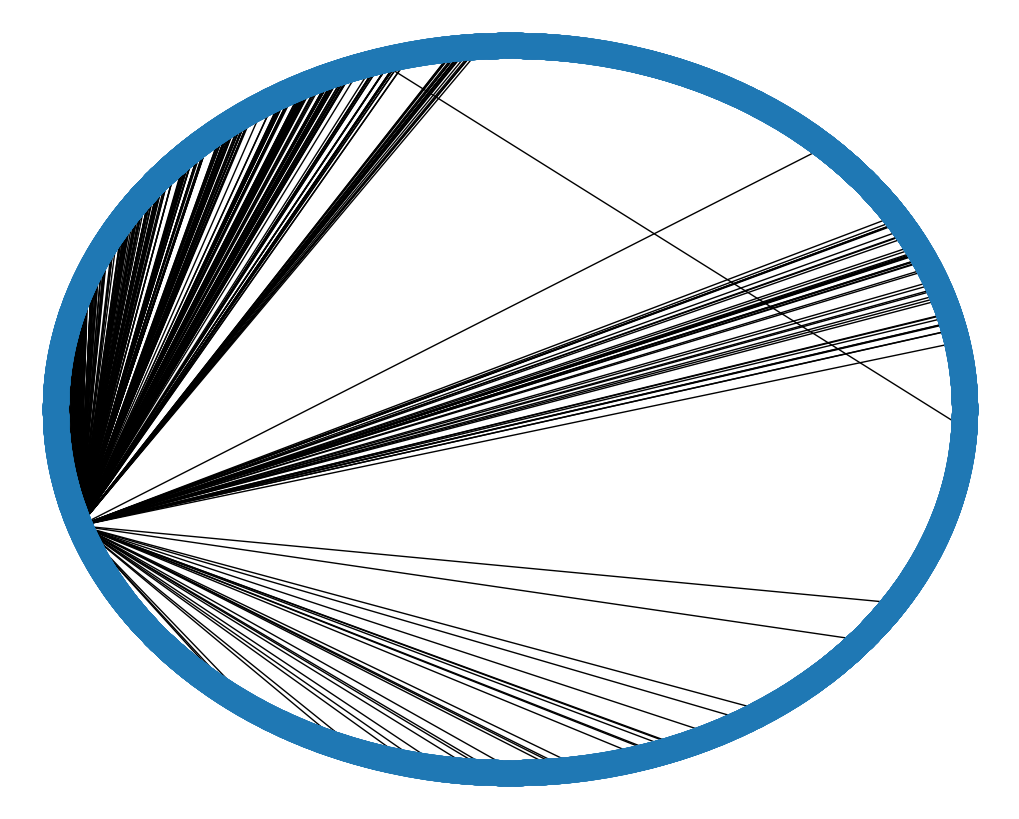

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(g)

In [23]:
G.columns

Index(['Name', 'City', 'Country', 'IATA_FAA', 'ICAO', 'Latitude', 'Longitude',
       'Altitude', 'Time'],
      dtype='object')